In [1]:
###import packages###
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator #formating number in charts
from scipy.stats import trim_mean
import os #to load csv to folder
import seaborn as sns
from IPython.display import display, HTML #for format

###removing scientific notation###
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
###Connection info for GitHub File###
url = 'https://github.com/TexasTori/ADS500B/raw/23fed13154371851d00cb375e177636726bf8bc2/house_sales.csv'
df_orig = pd.read_csv(url, sep=',')

###set up to automate files print location for team###
cwd = os.getcwd() 
log_prefix = os.path.join(cwd,'log_files')
print(log_prefix)

C:\Users\Widjaja\ADS500B\log_files


In [3]:
###Uncomment below for testing:###

#df_orig.head()
#df_orig.to_csv(os.path.join(log_prefix, "testpywrite.csv"), index=False)


In order to write data to a csv/txt file on your laptop, use the os.path.join()
###### Example:
df_test is the data you want to print to csv
###### Python:
df_orig.to_csv(os.path.join(log_prefix, "testpywrite.csv"), index=False)

Copy and paste the above code and update the data frame name at the beginning and the text between the " " which will name your file.

In [4]:
###view file sample###
df_orig.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [5]:
###Printing out the rows and columns of the dataset to highlight the dimensions###
print("Dimensions", df_orig.shape)

Dimensions (21613, 21)


In [6]:
###The datatypes of each column are found using dtypes()###
display(HTML("<u>Data Types:</u>"))
print(df_orig.dtypes)

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## The filetype is csv and the import method was through Pandas

In [7]:
###Null values count###
null_data = df_orig.isnull().sum()
display(HTML("<u>Null Data Counts:</u>"))
print(null_data)

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [8]:
display(HTML("<u>Price Details:</u>"))
df_orig['price'].describe().apply(lambda x: format(round(x,2), '.2f'))

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: object

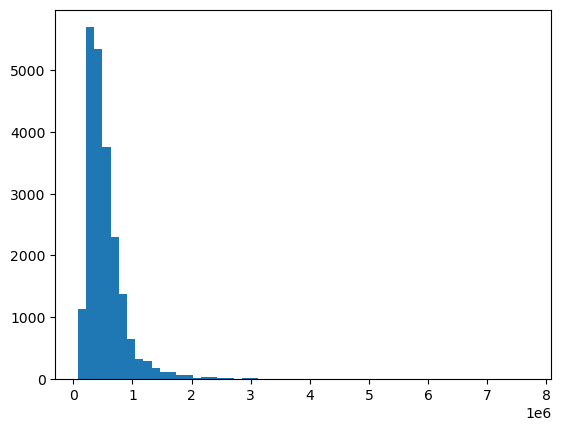

In [9]:
plt.hist(df_orig['price'], bins = 55)
plt.show()

###add title and axis -----------------------------------------------------------------------------------------

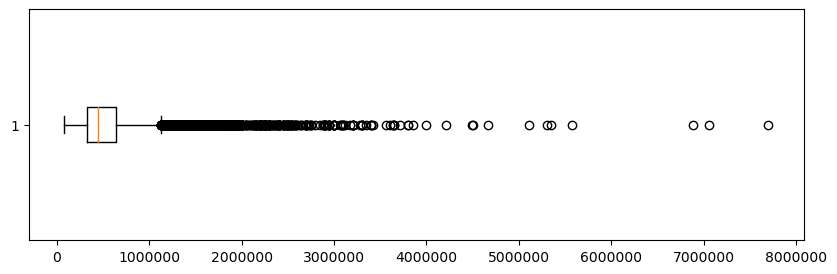

In [10]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.boxplot(df_orig['price'], vert=False)
ax.ticklabel_format(style='plain', axis='x')

###print out###
plt.show()
###add title and axis --------------------------------------------------------------------------------------

## Clean, Wrangle and Handle Missing Data Step

In [11]:
### BOBBY ###

### working copy ###
date_time_cleaned = df_orig.copy()

### Fixing date format###
date_time_cleaned['date'] = pd.to_datetime(df_orig['date'], format='%Y%m%dT%H%M%S', errors='coerce')

### Save the updated DataFrame to a new CSV file ###
date_time_cleaned.to_csv(os.path.join(log_prefix, "house_file_v2.csv"), index=False)

### sample of the cleaned data ###
display(HTML("<u>Sample of Cleaned Data:</u>"))
print(date_time_cleaned.head())

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00      3.00       1.00      1180.00   
1  6414100192 2014-12-09 538000.00      3.00       2.25      2570.00   
2  5631500400 2015-02-25 180000.00      2.00       1.00       770.00   
3  2487200875 2014-12-09 604000.00      4.00       3.00      1960.00   
4  1954400510 2015-02-18 510000.00      3.00       2.00      1680.00   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0   5650.00    1.00           0     0  ...      7        1180              0   
1   7242.00    2.00           0     0  ...      7        2170            400   
2  10000.00    1.00           0     0  ...      6         770              0   
3   5000.00    1.00           0     0  ...      7        1050            910   
4   8080.00    1.00           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1

In [12]:
###filtering and saving the data###
date_time_cleaned = date_time_cleaned[(date_time_cleaned['bedrooms'] != 0) & (date_time_cleaned['bathrooms'] != 0)]
date_time_cleaned.to_csv(os.path.join(log_prefix, 'filtered_date_time_cleaned.csv'), index=False)

###Descriptive statistics###
price_description = date_time_cleaned['price'].describe().apply(lambda x: format(round(x, 2), '.2f'))

display(HTML("<u>Price Details:</u>"))
print(price_description)

count      21598.00
mean      540200.32
std       367125.43
min        78000.00
25%       322000.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: object


In [13]:
date_time_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [14]:
### Removing the top and bottom 1% of data in the price column ###
working_data = pd.read_csv(os.path.join(log_prefix, 'filtered_date_time_cleaned.csv'))

### Establishing lower and upper bound using the bottom and upper 1% ##
upper_bound = working_data['price'].quantile(0.99)
lower_bound = working_data['price'].quantile(0.01)

display(HTML("<u>Defining Bounds to Remove Outliers:</u>"))
print("Upper bound =",round(upper_bound,2))
print("\nLower bound =",round(lower_bound,2))

### Only extracting the data in between the values above the lower bound and values lower than the upper bound ###
working_data2 = working_data[(working_data['price'] >= lower_bound) & (working_data['price'] <= upper_bound)]

Upper bound = 1965006.6

Lower bound = 154000.0


In [15]:
### Print Out summary of changes ###
record_start = "Record Start Total:".ljust(25)
num_dropped = "# of Records dropped:".ljust(25)
record_end = "Record End Total:".ljust(25)

print(f"\n{record_start}{df_orig.shape[0]}")
print(f"{num_dropped}{len(df_orig) - len(working_data2)}")
print(f"{record_end}{working_data2.shape[0]}")

###S ave copy of file to log s###
working_data2.to_csv(os.path.join(log_prefix, "filtered_price_cleaned.csv"), index=False)

### Describing the new dataframe with lower counts again as well as a new mean of 522,238 instead of the previous ###
### 540,200 ###
working_data2['price'].describe().apply(lambda x: format(round(x, 2), '.2f'))


Record Start Total:      21613
# of Records dropped:    446
Record End Total:        21167


count      21167.00
mean      522238.23
std       283392.31
min       154000.00
25%       325000.00
50%       450000.00
75%       639000.00
max      1965000.00
Name: price, dtype: object

In [16]:
df_clean = working_data2.copy() #pd.read_csv(os.path.join(log_prefix, 'filtered_price_cleaned.csv'))

###Check the range of 'price' to determine bin edges###
display(HTML("<u>Price Details:</u>"))
print(df_clean['price'].describe())

####Create bins for the 'price' column with 4 groups###
price_bins, bin_edges = pd.qcut(df_clean['price'], q=4, labels=False, retbins=True)

df_clean['price_group'] = price_bins

###Display the ranges for each bin & Check the distribution of the groups ###
display(HTML("<u>Bin Ranges:</u>"))
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    start, end = round(start, 2), round(end, 2)
    print(f"Bin {i + 1} Range: ({start}, {end}]")

# Check the distribution of the groups
display(HTML("<u>Group Distributions:</u>"))
print(df_clean['price_group'].value_counts())


##??date_time_cleaned.to_csv(os.path.join(log_prefix, "filtered_price_cleaned.csv"), index=False)
df_clean.to_csv(os.path.join(log_prefix, 'house_file_v2_grouped.csv'), index=False)


count     21167.00
mean     522238.23
std      283392.31
min      154000.00
25%      325000.00
50%      450000.00
75%      639000.00
max     1965000.00
Name: price, dtype: float64


Bin 1 Range: (154000.0, 325000.0]
Bin 2 Range: (325000.0, 450000.0]
Bin 3 Range: (450000.0, 639000.0]
Bin 4 Range: (639000.0, 1965000.0]


0    5410
3    5284
2    5247
1    5226
Name: price_group, dtype: int64


In [17]:
### Average 'bedrooms' per bin ###
avg_bedrooms_bin = round(df_clean.groupby('price_group')['bedrooms'].mean(),0)
df_clean['avg_bedrooms'] = df_clean.groupby('price_group')['bedrooms'].transform('mean').round(0)

### Print out average bedrooms per bin###
display(HTML("<u>Average Bedrooms per Bin:</u>"))
print(avg_bedrooms_bin)

###Replace NaN values in 'bedrooms' with values from 'avg_bedrooms' ###
df_clean['bedrooms'] = df_clean['bedrooms'].fillna(df_clean['avg_bedrooms'])


price_group
0   3.00
1   3.00
2   3.00
3   4.00
Name: bedrooms, dtype: float64


In [18]:
###Average 'bathrooms' per bin ###
avg_bathrooms_bin = round(df_clean.groupby('price_group')['bathrooms'].mean(),0)
df_clean['avg_bathrooms'] = df_clean.groupby('price_group')['bathrooms'].transform('mean').round(0)

### Print out average bbathroom per bin###
display(HTML("<u>Average Bathrooms per Bin:</u>"))
print(avg_bathrooms_bin)

###Replace NaN values in 'bathrooms' with values from 'avg_bathrooms' ###
df_clean['bathrooms'] = df_clean['bathrooms'].fillna(df_clean['avg_bathrooms'])


price_group
0   2.00
1   2.00
2   2.00
3   3.00
Name: bathrooms, dtype: float64


In [19]:
###Average 'SQFT' per bin ###
avg_sqft_living_bin = round(df_clean.groupby('price_group')['sqft_living'].mean(),0)
df_clean['avg_sqft_living'] = df_clean.groupby('price_group')['sqft_living'].transform('mean').round(0)

### Print out average SQFT per bin###
display(HTML("<u>Average SQFT Living per Bin:</u>"))
print(avg_sqft_living_bin)

###Replace NaN values in 'SQFT' with values from 'avg_sqft_living_bin' ###
df_clean['sqft_living'] = df_clean['sqft_living'].fillna(df_clean['avg_sqft_living'])


price_group
0   1497.00
1   1785.00
2   2079.00
3   2902.00
Name: sqft_living, dtype: float64


In [20]:
###Average 'sqft_lot' per bin ###
avg_sqft_lot_bin = round(df_clean.groupby('price_group')['sqft_lot'].mean(),0)
df_clean['avg_sqft_lot'] = df_clean.groupby('price_group')['sqft_lot'].transform('mean').round(0)

###Print out average sqft_lot per bin###
display(HTML("<u>Average SQFT Lot per Bin:</u>"))
print(avg_sqft_lot_bin)

###Replace NaN values in 'sqft_lot' with values from 'avg_sqft_lot' ###
df_clean['sqft_lot'] = df_clean['sqft_lot'].fillna(df_clean['avg_sqft_lot'])

price_group
0   10435.00
1   13030.00
2   16044.00
3   20974.00
Name: sqft_lot, dtype: float64


In [21]:
df_clean.head()

df_clean.to_csv(os.path.join(log_prefix, 'house_file_v2_grouped.csv'), index=False)

# CHECK THAT NULLS ARE HANDLED 

In [22]:
### Null values count ###
null_data = df_clean.isnull().sum()
display(HTML("<u>Null Data Counts:</u>"))
print(null_data)

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
price_group        0
avg_bedrooms       0
avg_bathrooms      0
avg_sqft_living    0
avg_sqft_lot       0
dtype: int64


## Need a title -----------------------------------

In [23]:
### Patricio ###

df_working = pd.read_csv(os.path.join(log_prefix, 'house_file_v2_grouped.csv'))

###Create a new column 'price per square foot'###
df_working['price_per_sqft'] = df_working['price'] / df_working['sqft_living']

### Normalize the 'price_per_sqft' column ###
price_per_sqft_mean = df_working['price_per_sqft'].mean()
price_per_sqft_std = df_working['price_per_sqft'].std()
df_working['price_per_sqft_normalized'] = (df_working['price_per_sqft'] - price_per_sqft_mean) / price_per_sqft_std

### Calculate the average 'price per square foot' for each zipcode ###
avg_price_per_sqft = df_working.groupby('zipcode')['price_per_sqft'].mean().reset_index(name='avg_price_per_sqft')
df_working = pd.merge(df_working, avg_price_per_sqft, on='zipcode', how='left')

### Convert 'condition' column into categorical data ###
df_working['condition'] = df_working['condition'].astype('category')

### Convert 'yr_built' to age ###
current_year = 2023
df_working['age'] = current_year - df_working['yr_built']

### Change '33' bedrooms to '3' ###
df_working.loc[df_working['bedrooms'] == 33, 'bedrooms'] = 3

### Set display option to show all columns ### 
pd.set_option('display.max_columns', None)

### Sample of the cleaned data ###
display(HTML("<u>Sample of Cleaned Data:</u>"))
print(df_working.head())


           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13 221900.00      3.00       1.00      1180.00   
1  6414100192  2014-12-09 538000.00      3.00       2.25      2570.00   
2  5631500400  2015-02-25 180000.00      2.00       1.00       770.00   
3  2487200875  2014-12-09 604000.00      4.00       3.00      1960.00   
4  1954400510  2015-02-18 510000.00      3.00       2.00      1680.00   

   sqft_lot  floors  waterfront  view condition  grade  sqft_above  \
0   5650.00    1.00           0     0         3      7        1180   
1   7242.00    2.00           0     0         3      7        2170   
2  10000.00    1.00           0     0         3      6         770   
3   5000.00    1.00           0     0         5      7        1050   
4   8080.00    1.00           0     0         3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
0              0      1955             0    98178 47.51 -122.26   
1     

In [24]:
print("Number of Duplicated ids:",df_working.duplicated(subset=['id']).sum(),"\n")

### Removing duplicates ###
df_working.drop_duplicates(subset=['id']) 

### drop the columns 'view', 'grade', 'long', and 'lat' ###
df_working.drop(['view', 'grade', 'long', 'lat', 'avg_bedrooms', 'avg_bathrooms', 
                 'avg_sqft_living', 'avg_sqft_lot'], axis=1, inplace=True)

Number of Duplicated ids: 152 

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13 221900.00      3.00       1.00      1180.00   
1  6414100192  2014-12-09 538000.00      3.00       2.25      2570.00   
2  5631500400  2015-02-25 180000.00      2.00       1.00       770.00   
3  2487200875  2014-12-09 604000.00      4.00       3.00      1960.00   
4  1954400510  2015-02-18 510000.00      3.00       2.00      1680.00   

   sqft_lot  floors  waterfront condition  sqft_above  sqft_basement  \
0   5650.00    1.00           0         3        1180              0   
1   7242.00    2.00           0         3        2170            400   
2  10000.00    1.00           0         3         770              0   
3   5000.00    1.00           0         5        1050            910   
4   8080.00    1.00           0         3        1680              0   

   yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  price_group  \
0      1955       

In [ ]:
price_bins = [0, 250000, 500000, 750000, 1000000, df_working['price'].max()]
price_labels = ['low', 'medium', 'high', 'very high', 'luxury']
df_working['price_category'] = pd.cut(df_working['price'], bins=price_bins, labels=price_labels, include_lowest=True)

### Save the transformed DataFrame ##
df_working.to_csv(os.path.join(log_prefix,'house_file_v2_cleaned.csv'), index=False)

### Display the first few rows to verify changes ###
print(df_working.head())

# We drop Grade but then use it in the next section.

In [25]:
### Display column names ###
print(df_working.columns)

### Check if 'grade' column exists ###
if 'grade' in df_working.columns:
    print("'grade' column exists.")
    # Convert it to an ordered categorical type
    grade_order = sorted(df_working['grade'].unique())
    grade_type = pd.CategoricalDtype(categories=grade_order, ordered=True)
    df_working['grade'] = df_working['grade'].astype(grade_type)
else:
    print("'grade' column does not exist. Check for typos or missing data.")

### Set the other columns as per their types ###
df_working['waterfront'] = df_working['waterfront'].astype('category')
df_working['zipcode'] = df_working['zipcode'].astype('category')
df_working['bedrooms'] = pd.to_numeric(df_working['bedrooms'], errors='coerce')  
df_working['price'] = pd.to_numeric(df_working['price'], errors='coerce')  

### Check the data types have been set correctly ###
print(df_working.dtypes)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price_group', 'price_per_sqft',
       'price_per_sqft_normalized', 'avg_price_per_sqft', 'age',
       'price_category'],
      dtype='object')
'grade' column does not exist. Check for typos or missing data.
id                              int64
date                           object
price                         float64
bedrooms                      float64
bathrooms                     float64
sqft_living                   float64
sqft_lot                      float64
floors                        float64
waterfront                   category
condition                    category
sqft_above                      int64
sqft_basement                   int64
yr_built                        int64
yr_renovated                    int64
zipcode          

# Beginning Part 2 - ONLY use df_final from here forward 
## (unless you are using a subset)

In [26]:
### Setting Final Data Frame for Vizualizations ###
df_final = df_working.copy()

df_final.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price_group,price_per_sqft,price_per_sqft_normalized,avg_price_per_sqft,age,price_category
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,3,1180,0,1955,0,98178,1340,5650,0,188.05,-0.70,190.97,68,low
1,6414100192,2014-12-09,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,3,2170,400,1951,1991,98125,1690,7639,2,209.34,-0.50,280.17,72,high
2,5631500400,2015-02-25,180000.00,2.00,1.00,770.00,10000.00,1.00,0,3,770,0,1933,0,98028,2720,8062,0,233.77,-0.26,225.08,90,low
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,5,1050,910,1965,0,98136,1360,5000,2,308.16,0.45,334.52,58,high
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,3,1680,0,1987,0,98074,1800,7503,2,303.57,0.41,264.16,36,high


Text(0.5, 1.0, 'Histogram of House Prices')

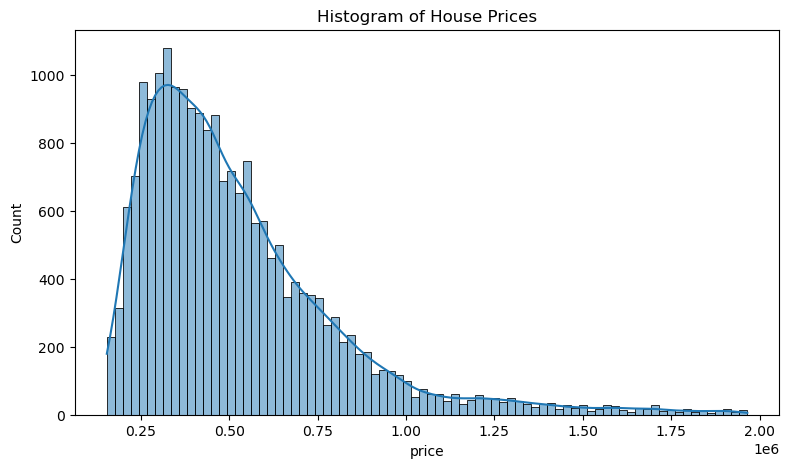

In [27]:
### Visualization of the distribution of 'price' ###
plt.figure(figsize= (20, 5))

### Histogram with a density plot for 'price' ###
plt.subplot(1, 2, 1)
sns.histplot(df_final['price'], kde=True)

plt.title('Histogram of House Prices')


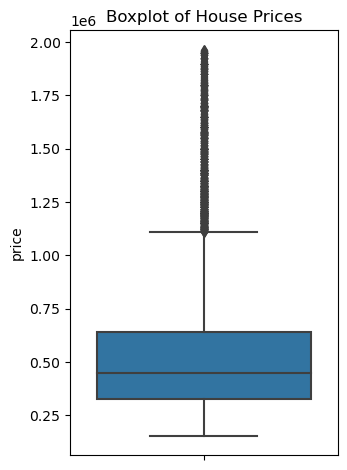

In [28]:
# Boxplot for 'price'
plt.subplot(1, 2, 2)
sns.boxplot(y=df_final['price'])
plt.title('Boxplot of House Prices')

# Display the plot
plt.tight_layout()
plt.show()


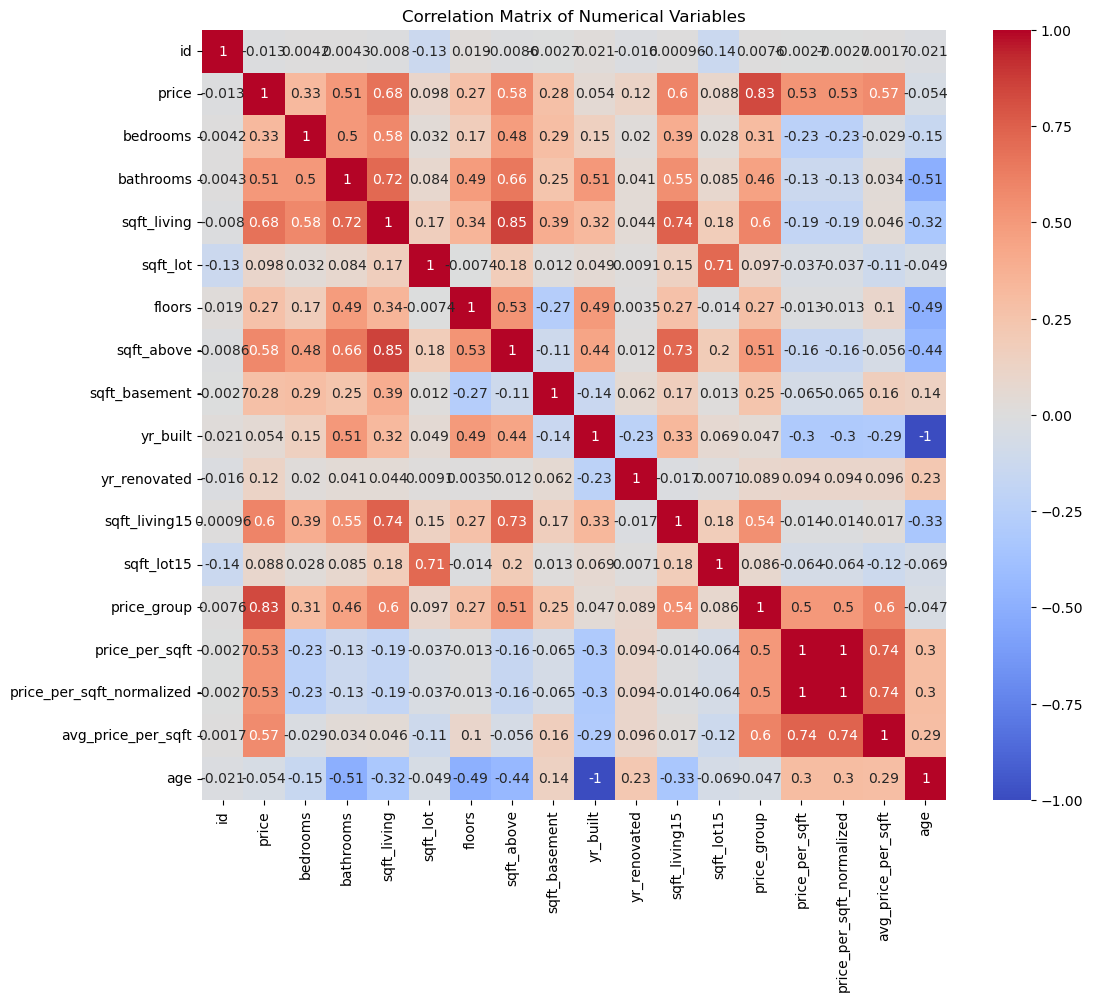

In [29]:
numerical_df = df_final.select_dtypes(include=['float64', 'int64'])

### Correlation matrix heatmap using only numerical columns  ###
plt.figure(figsize=(12, 10))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()